In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, classification_report, confusion_matrix
)

import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
data = pd.read_csv("BankNoteAuthentication.csv")

print("Данные загружены")
print("Размер данных:", data.shape)
print("\nПервые 5 строк:")
data.head()

Данные загружены
Размер данных: (1372, 5)

Первые 5 строк:


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Пропущенные значения:
variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

Распределение классов:
class
0    762
1    610
Name: count, dtype: int64


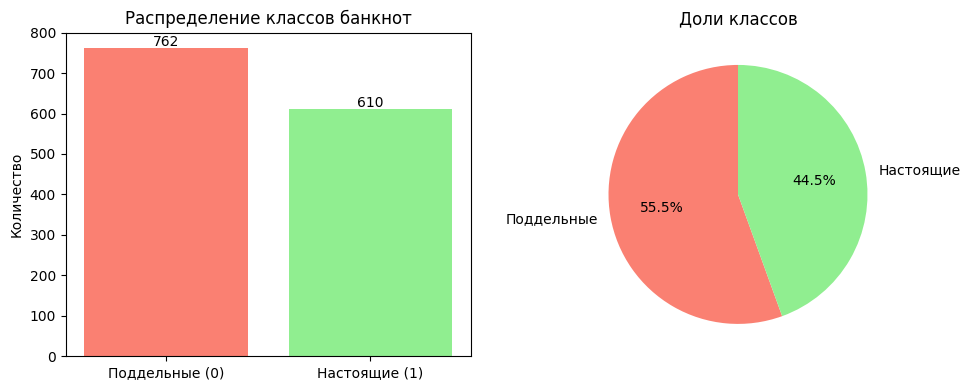

In [6]:
print("Пропущенные значения:")
print(data.isnull().sum())

print("\nРаспределение классов:")
class_counts = data['class'].value_counts()
print(class_counts)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
bars = plt.bar(['Поддельные (0)', 'Настоящие (1)'],
               class_counts.values,
               color=['salmon', 'lightgreen'])
plt.title("Распределение классов банкнот")
plt.ylabel("Количество")

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h+5, int(h),
             ha='center')

plt.subplot(1,2,2)
plt.pie(class_counts.values,
        labels=['Поддельные', 'Настоящие'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['salmon', 'lightgreen'])
plt.title("Доли классов")

plt.tight_layout()
plt.show()

In [24]:
features = ['variance', 'skewness', 'curtosis', 'entropy']

X = data.drop('class', axis=1)
y = data['class']

print("Признаки:", list(X.columns))
print("Размер матрицы признаков:", X.shape)
print("Размер целевой переменной:", y.shape)
print("Целевая переменная: ", y.name)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nОбучающая выборка:", X_train.shape)
print("Тестовая выборка:", X_test.shape)

print("\n0 — поддельная банкнота")
print("1 — настоящая банкнота")

Признаки: ['variance', 'skewness', 'curtosis', 'entropy']
Размер матрицы признаков: (1372, 4)
Размер целевой переменной: (1372,)
Целевая переменная:  class

Обучающая выборка: (960, 4)
Тестовая выборка: (412, 4)

0 — поддельная банкнота
1 — настоящая банкнота


МЕТОД k-БЛИЖАЙШИХ СОСЕДЕЙ (kNN)
Оптимальное количество соседей (k): 2
Максимальная точность: 0.9979


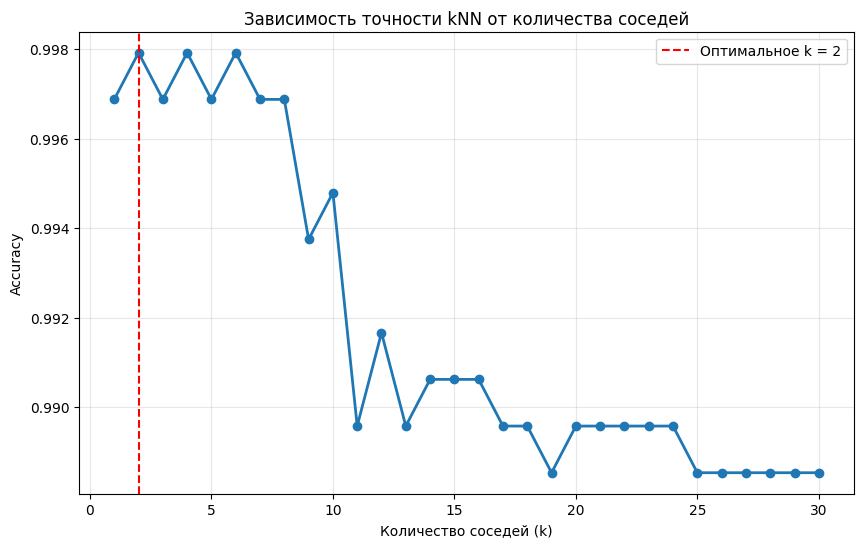


Результаты kNN классификации:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Отчет по классификации kNN:
                  precision    recall  f1-score   support

   Fake banknote       1.00      1.00      1.00       229
Genuine banknote       1.00      1.00      1.00       183

        accuracy                           1.00       412
       macro avg       1.00      1.00      1.00       412
    weighted avg       1.00      1.00      1.00       412



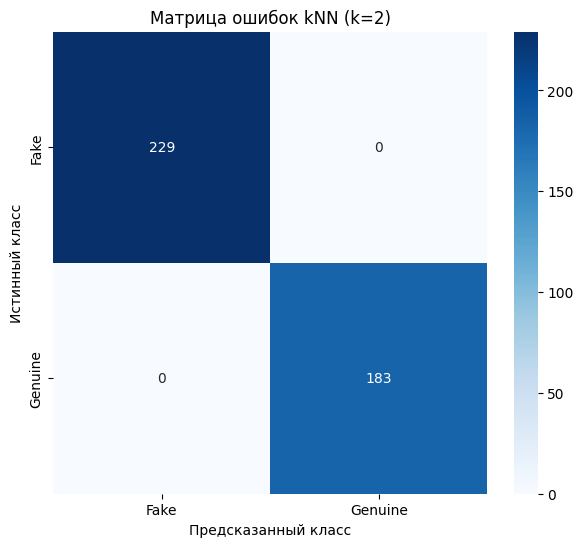


------------------------------------------------------------
ДЕРЕВО РЕШЕНИЙ
------------------------------------------------------------
Оптимальная глубина дерева: 7
Максимальная точность: 0.9865


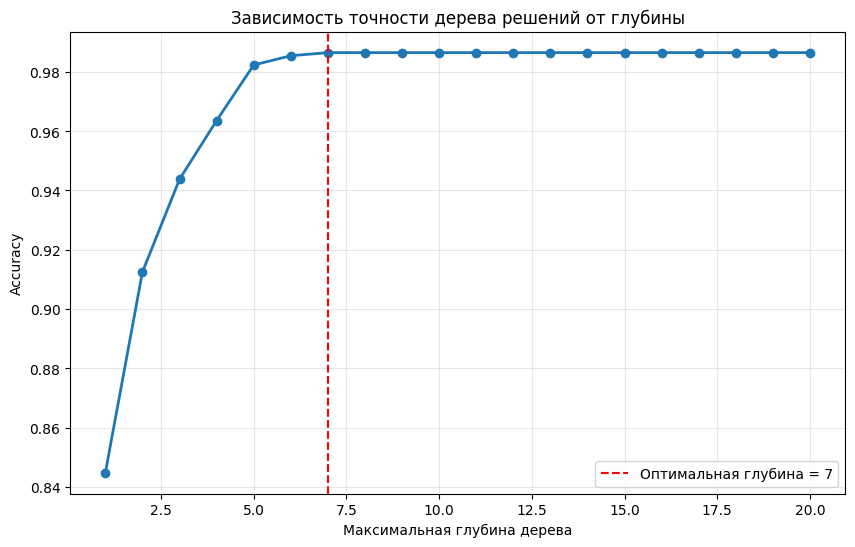


Результаты классификации деревом решений:
Accuracy: 0.9878640776699029
Precision: 0.978494623655914
Recall: 0.994535519125683
F1-score: 0.986449864498645

Отчет по классификации деревом решений:
                  precision    recall  f1-score   support

   Fake banknote       1.00      0.98      0.99       229
Genuine banknote       0.98      0.99      0.99       183

        accuracy                           0.99       412
       macro avg       0.99      0.99      0.99       412
    weighted avg       0.99      0.99      0.99       412



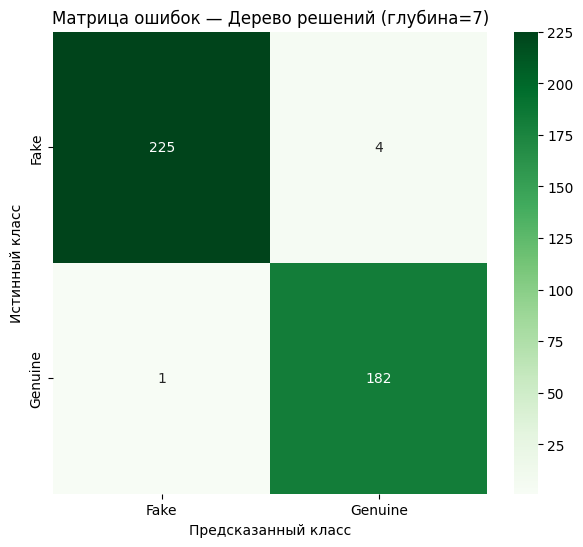

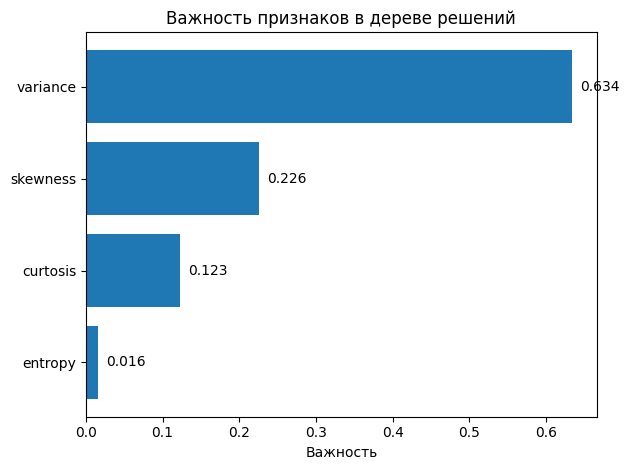

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)

print("-" * 60)
print("МЕТОД k-БЛИЖАЙШИХ СОСЕДЕЙ (kNN)")
print("-" * 60)

k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,
        X_train_scaled,
        y_train,
        cv=5,
        scoring='accuracy'
    )
    k_scores.append(scores.mean())

optimal_k = k_range[np.argmax(k_scores)]
print(f"Оптимальное количество соседей (k): {optimal_k}")
print(f"Максимальная точность: {max(k_scores):.4f}")
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linewidth=2)
plt.axvline(optimal_k, linestyle='--', color='red', label=f'Оптимальное k = {optimal_k}')
plt.title('Зависимость точности kNN от количества соседей')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Accuracy')
plt.grid(alpha=0.3)
plt.legend()
plt.show()
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)
print("\nРезультаты kNN классификации:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-score:", f1_score(y_test, y_pred_knn))

print("\nОтчет по классификации kNN:")
print(classification_report(
    y_test,
    y_pred_knn,
    target_names=['Fake banknote', 'Genuine banknote']
))
plt.figure(figsize=(7, 6))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(
    cm_knn,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Fake', 'Genuine'],
    yticklabels=['Fake', 'Genuine']
)
plt.title(f'Матрица ошибок kNN (k={optimal_k})')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()
from sklearn.tree import DecisionTreeClassifier

print("\n" + "-" * 60)
print("ДЕРЕВО РЕШЕНИЙ")
print("-" * 60)

max_depth_range = range(1, 21)
tree_scores = []

for depth in max_depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(
        tree,
        X_train,
        y_train,
        cv=5,
        scoring='accuracy'
    )
    tree_scores.append(scores.mean())

optimal_depth = max_depth_range[np.argmax(tree_scores)]
print(f"Оптимальная глубина дерева: {optimal_depth}")
print(f"Максимальная точность: {max(tree_scores):.4f}")
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, tree_scores, marker='o', linewidth=2)
plt.axvline(optimal_depth, linestyle='--', color='red',
            label=f'Оптимальная глубина = {optimal_depth}')
plt.title('Зависимость точности дерева решений от глубины')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Accuracy')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

tree_model = DecisionTreeClassifier(
    max_depth=optimal_depth,
    random_state=42
)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
y_pred_proba_tree = tree_model.predict_proba(X_test)
print("\nРезультаты классификации деревом решений:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1-score:", f1_score(y_test, y_pred_tree))

print("\nОтчет по классификации деревом решений:")
print(classification_report(
    y_test,
    y_pred_tree,
    target_names=['Fake banknote', 'Genuine banknote']
))

plt.figure(figsize=(7, 6))
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(
    cm_tree,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['Fake', 'Genuine'],
    yticklabels=['Fake', 'Genuine']
)
plt.title(f'Матрица ошибок — Дерево решений (глубина={optimal_depth})')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

feature_importance = tree_model.feature_importances_
importance_df = pd.DataFrame({
    'Признак': features,
    'Важность': feature_importance
}).sort_values('Важность')

bars = plt.barh(importance_df['Признак'], importance_df['Важность'])
plt.title('Важность признаков в дереве решений')
plt.xlabel('Важность')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01,
             bar.get_y() + bar.get_height()/2,
             f'{width:.3f}',
             va='center')

plt.tight_layout()
plt.show()



СРАВНЕНИЕ РЕЗУЛЬТАТОВ МОДЕЛЕЙ
Сравнение моделей:
           Модель  Accuracy  Precision  Recall  F1-Score
0             kNN    1.0000     1.0000  1.0000    1.0000
1  Дерево решений    0.9879     0.9785  0.9945    0.9864


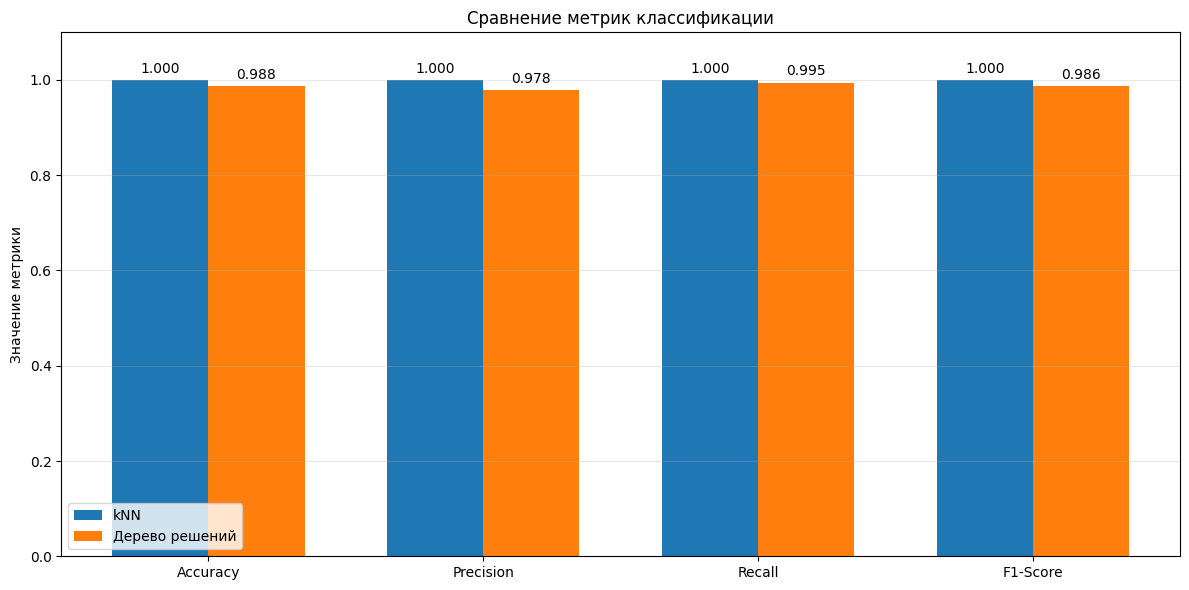

In [28]:
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ МОДЕЛЕЙ")
print("=" * 60)

models = ['kNN', 'Дерево решений']

accuracy_scores = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_tree)
]

precision_scores = [
    precision_score(y_test, y_pred_knn, average='binary'),
    precision_score(y_test, y_pred_tree, average='binary')
]

recall_scores = [
    recall_score(y_test, y_pred_knn, average='binary'),
    recall_score(y_test, y_pred_tree, average='binary')
]

f1_scores = [
    f1_score(y_test, y_pred_knn, average='binary'),
    f1_score(y_test, y_pred_tree, average='binary')
]

comparison_df = pd.DataFrame({
    'Модель': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

print("Сравнение моделей:")
print(comparison_df.round(4))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, comparison_df.iloc[0, 1:], width, label='kNN')
rects2 = ax.bar(x + width/2, comparison_df.iloc[1, 1:], width, label='Дерево решений')

ax.set_ylabel('Значение метрики')
ax.set_title('Сравнение метрик классификации')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1.1)
ax.grid(True, alpha=0.3, axis='y')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

ROC-АНАЛИЗ
------------------------------------------------------------


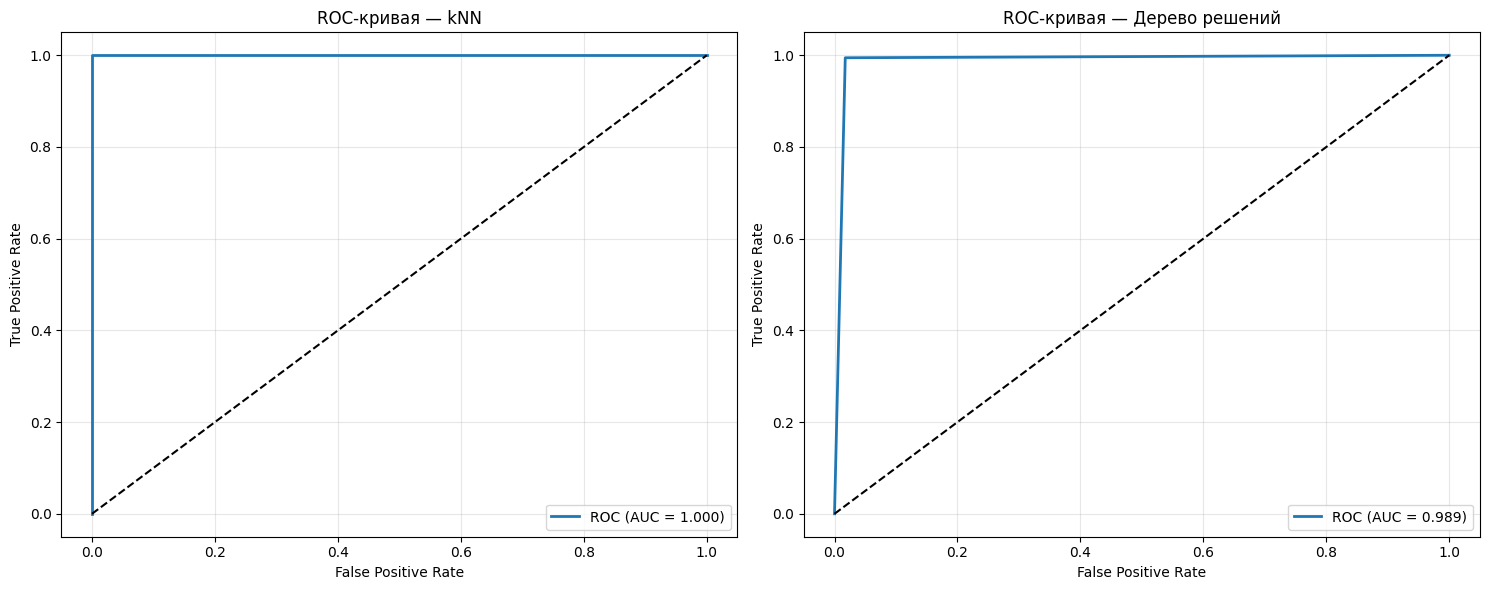

ROC-AUC kNN: 1.0000
ROC-AUC Дерева решений: 0.9885

Интерпретация AUC:
AUC = 1.0: Идеальный классификатор
0.9 < AUC < 1.0: Отличный классификатор
0.8 < AUC < 0.9: Хороший классификатор
0.7 < AUC < 0.8: Удовлетворительный классификатор
AUC = 0.5: Случайный классификатор


In [32]:
print("ROC-АНАЛИЗ")
print("-" * 60)

# ROC для kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# ROC для дерева решений
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(15, 6))

# --- kNN ---
plt.subplot(1, 2, 1)
plt.plot(fpr_knn, tpr_knn, lw=2,
         label=f'ROC (AUC = {roc_auc_knn:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая — kNN')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# --- Decision Tree ---
plt.subplot(1, 2, 2)
plt.plot(fpr_tree, tpr_tree, lw=2,
         label=f'ROC (AUC = {roc_auc_tree:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая — Дерево решений')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"ROC-AUC kNN: {roc_auc_knn:.4f}")
print(f"ROC-AUC Дерева решений: {roc_auc_tree:.4f}")

print("\nИнтерпретация AUC:")
print("AUC = 1.0: Идеальный классификатор")
print("0.9 < AUC < 1.0: Отличный классификатор")
print("0.8 < AUC < 0.9: Хороший классификатор")
print("0.7 < AUC < 0.8: Удовлетворительный классификатор")
print("AUC = 0.5: Случайный классификатор")

In [38]:
print("ВЫВОДЫ ПО ЛАБОРАТОРНОЙ РАБОТЕ №3")
print("Исследование алгоритмов классификации")
print("-" * 60)

print("\n1. АНАЛИЗ ДАННЫХ И ПОДГОТОВКА:")
print(" Целевой атрибут: Class (подлинная / поддельная банкнота)")
print(" Количество признаков: 4 статистических характеристики изображения")
print(" Баланс классов: близок к равномерному")
print(" Разделение данных: 70% обучение / 30% тестирование")
print(" Выполнено масштабирование признаков")

print("\n2. ОПТИМАЛЬНЫЕ ПАРАМЕТРЫ МОДЕЛЕЙ:")
print(f" kNN: оптимальное число соседей k = {optimal_k}")
print(f" Дерево решений: оптимальная глубина = {optimal_depth}")

print("\n3. РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ:")
print(" kNN:")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"   F1-score: {f1_score(y_test, y_pred_knn):.4f}")
print(f"   ROC-AUC: {roc_auc_knn:.4f}")

print("\n Дерево решений:")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"   F1-score: {f1_score(y_test, y_pred_tree):.4f}")
print(f"   ROC-AUC: {roc_auc_tree:.4f}")

print("\n4. СРАВНИТЕЛЬНЫЙ АНАЛИЗ:")
accuracy_diff = accuracy_score(y_test, y_pred_knn) - accuracy_score(y_test, y_pred_tree)
better_model = "kNN" if accuracy_diff > 0 else "Дерево решений"

print(f"  Более точная модель: {better_model}")
print(f"  Разница в точности: {abs(accuracy_diff):.4f}")

print("\n5. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ (Дерево решений):")
for _, row in importance_df.sort_values('Важность', ascending=False).iterrows():
    print(f"  {row['Признак']}: {row['Важность']:.3f}")

print("\n6. ROC-АНАЛИЗ:")
print(" Значения AUC близки к 1.0, что говорит о высокой разделимости классов")
print(" ROC-кривые значительно превышают диагональ случайного классификатора")

print("\n7. ПРАКТИЧЕСКИЕ ВЫВОДЫ:")
print(" Оба алгоритма эффективно решают задачу классификации банкнот")
print(" kNN чувствителен к масштабированию признаков")
print(" Дерево решений предоставляет интерпретируемую модель")
print(" Высокая точность подтверждает качество исходных данных")

print("\n8. РЕКОМЕНДАЦИИ:")
print(" Для практического применения рекомендуется использовать дерево решений")
print(" Для повышения надежности можно применить ансамблевые методы")

ВЫВОДЫ ПО ЛАБОРАТОРНОЙ РАБОТЕ №3
Исследование алгоритмов классификации
------------------------------------------------------------

1. АНАЛИЗ ДАННЫХ И ПОДГОТОВКА:
 Целевой атрибут: Class (подлинная / поддельная банкнота)
 Количество признаков: 4 статистических характеристики изображения
 Баланс классов: близок к равномерному
 Разделение данных: 70% обучение / 30% тестирование
 Выполнено масштабирование признаков

2. ОПТИМАЛЬНЫЕ ПАРАМЕТРЫ МОДЕЛЕЙ:
 kNN: оптимальное число соседей k = 2
 Дерево решений: оптимальная глубина = 7

3. РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ:
 kNN:
   Accuracy: 1.0000
   F1-score: 1.0000
   ROC-AUC: 1.0000

 Дерево решений:
   Accuracy: 0.9879
   F1-score: 0.9864
   ROC-AUC: 0.9885

4. СРАВНИТЕЛЬНЫЙ АНАЛИЗ:
  Более точная модель: kNN
  Разница в точности: 0.0121

5. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ (Дерево решений):
  variance: 0.634
  skewness: 0.226
  curtosis: 0.123
  entropy: 0.016

6. ROC-АНАЛИЗ:
 Значения AUC близки к 1.0, что говорит о высокой разделимости классов
 ROC-крив